# Marketing Campaign Optimization
Tony Blonigan

Note: While I stuck to the data in building and evaluating models, some of the background is based off of unchecked assumptions. The point of this notebook is to illustrate how to leverage data to drive business objectives, not simply build predictive models. A business context makes this a much easier read, so I embelished some details that were not covered in the materials related to the original [dataset](https://www.kaggle.com/c/springleaf-marketing-response/data).

### Contents

1. [Business Objective](#bo)
2. [Data Analysis](#da)
3. [Predictive Modeling](#pm)
4. [Strategic plan](#sp)
4. [Next Steps](#ns)
    
<a id='bo'></a>
# Business Objective

## Background
Springleaf is a personal leanding company that provides subprime loans people can use to purchase consumer goods. The company wishes to imporove its direct mail marketing campaign and has published [this](https://www.kaggle.com/c/springleaf-marketing-response/data) dataset for research. The goal of this project is not to simply create a predictive model that will increase the company's conversion rate, from a baseline of 23%, but also to illustrate a comprehensive marketing strategy and the value it can deliver to the company.

- Data
  - 145.2K rows
  - 1934 columns
  - The column called 'target' indicates whether the opportunity was converted
- Objective
  - Improve promotional targeting
  - Increase conversion rate from baseline of 23%
  - Optimize profit through comprehensive marketing strategy
  
### Current Strategy
Currently, the company is using domain knowledge of inhouse marketers to target broad market segments based on high-level, demographic indicators. For example, they know their conversion rate is higher among users in the North East (N.E.), so they send promotional literature to everyone in the N.E., on their client list. We can understand this as a crude method of propensity scoring (P.S.), where a higher P.S. corresponds to a higher probability of conversion. In this example people in the N.E. would have a higher P.S. than, say, people in the Mid-West.

We can visualize group of N.E. clients by representing each individual as a dot, where its P.S. represented by darkness of the dot (the higher the P.S., the darker the dot).

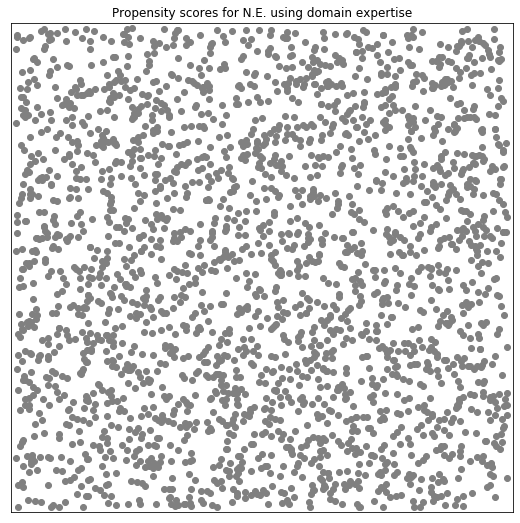

In [37]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data if its not already loaded
try:
    df
except NameError:
    df = pd.read_csv('data/train.csv.zip')

# create market strategy visualizations for presentation
np.random.seed(1)


# setup data for illustrations of current v future strategy
# vector of probs for n representitive samples (sorted by p, ascending)
n = 2500
p = np.random.uniform(0, 1, n)
p = np.sort(p)
y_loc = np.random.uniform(0, 1, n)
# shuffled index
idx_shuffled = np.random.choice(np.arange(n), n, replace=False)

# plot current scoring illustration
fig, ax = plt.subplots(figsize=(9, 9))
plt.scatter(p[idx_shuffled], y_loc, color='grey')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)
plt.title('Propensity scores for N.E. using domain expertise')
plt.show()

### Improved Propensity Scoring
As you can see in the plot above, while using coarse, demographic data to target customers is a good start to optimizing marketing campaigns, the resulting scores are not very precise. It would be much better if we could score each individual, but this becomes an untractable amount of work for domain experts to do. Better to automate this using machine learning.

To illustrate this idea, lets imagine what the scores machine learning could generate and think through the consequences.

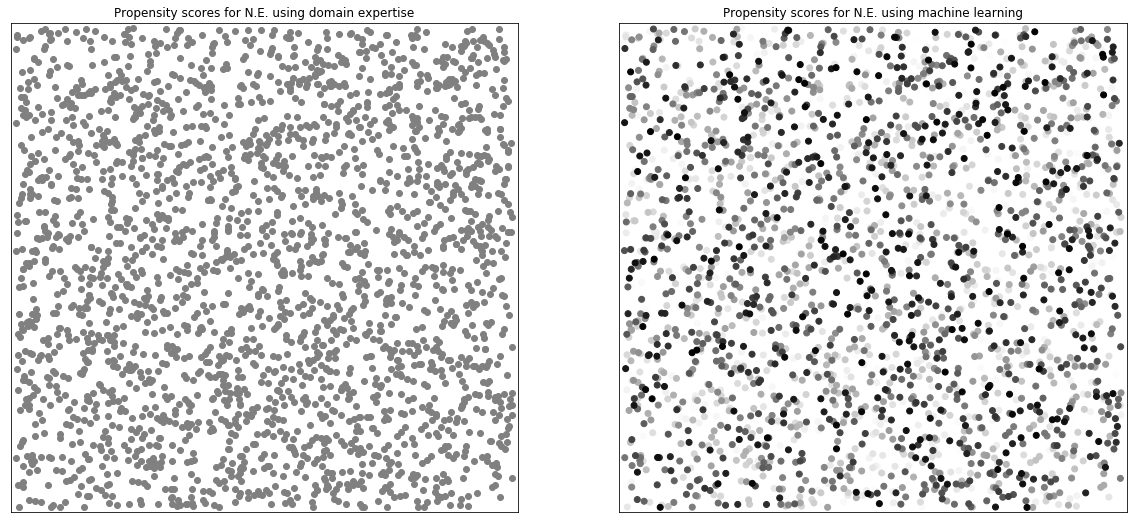

In [65]:
# plot future scoring illustration
fig, ax = plt.subplots(1, 2, figsize=(20, 9))
ax[0].scatter(p[idx_shuffled], y_loc, color='grey')
ax[1].scatter(p[idx_shuffled], y_loc, c=p, cmap='Greys')
for i in range(2):
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_xlim(-.01, 1.01)
    ax[i].set_ylim(-.01, 1.01)
ax[0].set_title('Propensity scores for N.E. using domain expertise')
ax[1].set_title('Propensity scores for N.E. using machine learning')

plt.show()

As illustrated above, using domain experts to set marketing targets resluts in a crude approximation of conversion propensity. This can be explained mostly by two limitations:
- It is difficult for humans to pull patterns out of a dataset with ~2k columns, leading to oversimplifications of the problem
- It is time consuming/expensive for humans to review each potential client before determining their propensity score

Fortunately, machine learning easily overcomes both of these limitations, allowing us to calculate much more precise propensity scores, like the ones in the right-hand chart above.

### Bennefits
As we will demonstrate later on, more precise propensity scores will allow us to:
1. Reduce marketing costs by limiting promotional materials being sent to customers who will not convert, and
2. Maintaine revenue generation by continuing to send promotional materials to customers who will convert.

To the extent that we are lowering costs faster than we are reducing revenue generation, we will increase both ROI and profit.


(array([   0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,    0.,
           0.]),
 array([-0.26745323, -0.16745323, -0.06745323,  0.03254677,  0.13254677,
         0.23254677,  0.33254677,  0.43254677,  0.53254677,  0.63254677,
         0.73254677]),
 <a list of 10 Patch objects>)

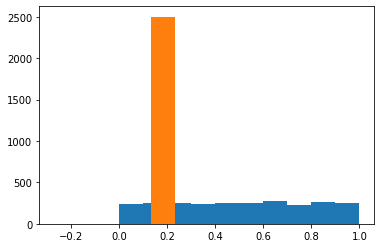

In [29]:
# targetd clients
msk = p >= .9

# add zero probability obs to end so that the color scale is the same
x_filtered = p[idx_shuffled][msk]
x_filtered = np.concatenate((np.array([9]), x_filtered))

y_filtered = y_loc[msk]
y_filtered = np.concatenate((np.array([9]), y_filtered))

p_filtered = p[msk]
p_filtered = np.concatenate((np.array([0]), p_filtered))

fig, ax = plt.subplots(figsize=(9, 9))
plt.scatter(x_filtered, y_filtered, c=p_filtered, cmap='Greys')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)
plt.title('Optimized marketing campaign targets')
plt.show()


# results
msk = p >= .9

# add zero probability obs to end so that the color scale is the same
x_filtered = p[idx_shuffled][msk]
x_filtered = np.concatenate((np.array([9]), x_filtered))

y_filtered = y_loc[msk]
y_filtered = np.concatenate((np.array([9]), y_filtered))

p_filtered = np.random.choice((0, 1), len(y_filtered) -1, replace=True, p=(.2, .8))
p_filtered = np.concatenate((np.array([0]), p_filtered))

fig, ax = plt.subplots(figsize=(9, 9))
# idx_random = np.random.choice()
msk = p_filtered == 0
plt.scatter(x_filtered[msk], y_filtered[msk], color='C0', label='not converted')
plt.scatter(x_filtered[~msk], y_filtered[~msk], color='C1', label='converted')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)
plt.legend()
plt.title('Optimized marketing campaign results')
plt.show()